In [43]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

In [44]:
prices=[100,102,103,99,98,101,104,103]
index_last_price=len(prices)-1
action_space_size = 3 
state_space_size = 16 
num_episodes = 10000
learning_rate = 0.2
discount_rate = 0.95
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay = 0.999
q_table = np.zeros((state_space_size, action_space_size))

In [45]:
def get_states(prices):
    prices=prices
    states=[]
    for s in range(len(prices)):
        for b in range(2):
            states.append([s,b])
    return states

def get_next_state_reward(action,bought_price): #0=hold, 1= buy, 2=sell
    if state[1] ==0: #not yet bought stock
        if action==0:
            reward=0
            next_state=[state[0]+1,0]
            
        if action==1:
            reward=0  
            next_state=[state[0]+1,1]
            bought_price=prices[state[0]]
            
        if action==2:
            next_state=[state[0]+1,0] 
            reward=-10
            
    if state[1] ==1:   #already bought stock     
        if action==0:
            reward=0
            next_state=[state[0]+1,1]
            
        if action==1:
            reward=-10 
            next_state=[state[0]+1,1]
            
        if action==2:
            next_state=[state[0]+1,0] 
            reward=max(prices[state[0]]-bought_price,0)
            bought_price=0
   
    done = True if next_state[0] == index_last_price else False  
    return next_state, reward, done, bought_price

In [46]:
states=get_states(prices)
exploration_rate=1
rewards_all_episodes=[]
explorations=[]
for episode in range(10000):
    state = [0,0]
    done = False
    rewards_current_episode = 0
    bought_price=None
    while True:
        # get action,  random or best one:
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[states.index(state),:]) #exploitation
        else:
            action = np.random.randint(action_space_size) #exploration
        #get next_sate and reward for the given action:
        next_state, reward, done,bought_price = get_next_state_reward(action,bought_price)
        #update Q value
        q_table[states.index(state), action] = q_table[states.index(state), action]* \
        (1 - learning_rate) + learning_rate * \
        (reward + discount_rate * np.max(q_table[states.index(next_state), :]))
  
        state = next_state
        rewards_current_episode += reward
        
        if done == True: 
            break
    if exploration_rate>min_exploration_rate:
        exploration_rate *= exploration_decay
    explorations.append(exploration_rate)
    rewards_all_episodes.append(rewards_current_episode)

In [47]:
#Q-table:
df=pd.DataFrame(q_table,columns=["hold","buy","sell"])
df.index.name="state"
df

,hold,buy,sell
state,,,
0,6.324192,7.086587,-3.624354
1,0.000000,0.000000,0.000000
2,3.503601,7.246483,-6.362319
3,7.477077,-2.994128,6.501986
4,4.747349,4.364022,-5.199296
5,4.453328,-5.455022,7.880744
6,5.142000,4.747202,-4.945348
7,4.896307,-6.126031,2.830259
8,4.990768,5.414307,-4.933427


In [48]:
#check average rewards during last 100 epochs
np.mean(rewards_all_episodes[-100:])

8.54

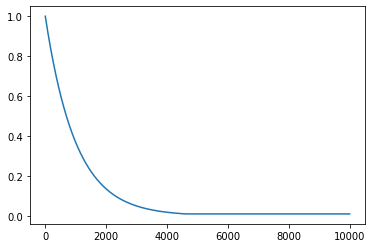

In [49]:
#exploration rate
plt.plot(explorations) 
plt.show;

In [50]:
#validation, always choose the best action
state=[0,0]
result=[]
while True:
    action = np.argmax(q_table[states.index(state),:])
    next_state, reward, done,bought_price = get_next_state_reward(action,bought_price)
    result.append([state[0],prices[state[0]],action,reward])
    state = next_state
    if done == True:
        break
pd.DataFrame(result,columns=["timestep","price","action", "reward"])

,timestep,price,action,reward
0,0,100,1,0
1,1,102,0,0
2,2,103,2,3
3,3,99,0,0
4,4,98,1,0
5,5,101,0,0
6,6,104,2,6
